In [7]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/920.8 kB 435.7 kB/s eta 0:00:03
   ----- ---------------------------------- 122.9/920.8 kB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/920.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------- ----- 798.7/920.8 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 4.8 MB/s eta 0:00:00



===== FUZZY CONTROLLER SYSTEM =====
Input Temperature : 28°C
Output Fan Speed  : 63.74%



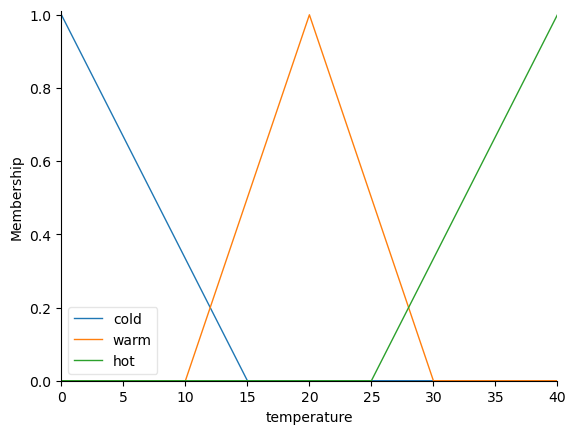

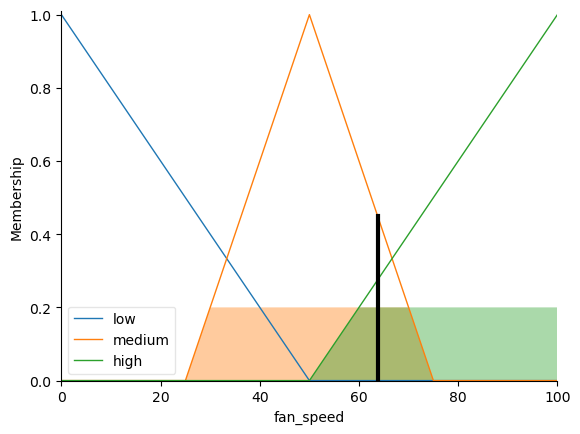

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl #to install !pip install scikit-fuzzy
import matplotlib.pyplot as plt


temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature') 
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')     

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['warm'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'], fan_speed['high'])

fan_ctrl_system = ctrl.ControlSystem([rule1, rule2, rule3])
fan = ctrl.ControlSystemSimulation(fan_ctrl_system)

input_temp = 28
fan.input['temperature'] = input_temp

fan.compute()

print("\n===== FUZZY CONTROLLER SYSTEM =====")
print(f"Input Temperature : {input_temp}°C")
print(f"Output Fan Speed  : {fan.output['fan_speed']:.2f}%")
print("===================================\n")

temperature.view()
fan_speed.view(sim=fan)
plt.show()